## Crawling and Extracting Data from Websites

In [5]:
!curl -u "<d0ee6659e480fcc0fdcf9e2ccfbb2f70>:X" https://api.robowhois.com/v1/whois/Firstdevapp.com

curl: (60) SSL certificate problem: unable to get local issuer certificate
More details here: http://curl.haxx.se/docs/sslcerts.html

curl performs SSL certificate verification by default, using a "bundle"
 of Certificate Authority (CA) public keys (CA certs). If the default
 bundle file isn't adequate, you can specify an alternate file
 using the --cacert option.
If this HTTPS server uses a certificate signed by a CA represented in
 the bundle, the certificate verification probably failed due to a
 problem with the certificate (it might be expired, or the name might
 not match the domain name in the URL).
If you'd like to turn off curl's verification of the certificate, use
 the -k (or --insecure) option.


In [ ]:
#!/usr/bin/env python

import requests
print "hi"
def whoapi_check_domain_taken(domain, apikey):
    
 
    r= requests.get("http://api.whoapi.com/?domain=whoapi.com&r=whois&apikey=d0ee6659e480fcc0fdcf9e2ccfbb2f70")
    if r.status_code == 200:
        data = r.json()
        if int(data['status']) == 0:
            return int(data['taken']) == 1
        else:
            raise Exception(data['status_desc'])
    else:
        raise Exception('unexpected status code %d' % r.status_code)

print whoapi_check_domain_taken('whoapi.com', 'demokey')

This module uses a set of non-standard libraries, which need to be installed on your machine. By default, your instance should have these installed, but if this is not the case, type these in the Unix shell prompt

`sudo apt-get install libxml2-dev libxslt-dev python-dev` 

and then

`sudo pip install lxml`

`sudo pip install pandas`

It will take a few minutes to get everything installed.

### Fetching the headlines from ESPN.com

Let's start by trying to fetch the headlines from the site ESPN.com.



In [2]:
import requests # This command allows us to fetch URLs
from lxml import html # This module will allow us to parse the returned HTML/XML
import pandas # To create a dataframe

# Let's start by fetching the page, and parsing it
url = "http://www.espn.com/"
response = requests.get(url) # get the html of that url
doc = html.fromstring(response.text) # parse it and create a document

In [3]:
import pandas # To create a dataframe

# Let's start by fetching the page, and parsing it
url = "http://www.espn.com/"
response = requests.get(url) # get the html of that url
doc = html.fromstring(response.text) # parse it and create a document

# We search for the text of the headlines in the source
# and we see that they are all under a <ul class="headlines"> tag
# which is also the only such tag in the html source
# So, we can use the "find" command (instead of the "findall", 
# which would return a list, with just a single entry in this case)
headlineNode = doc.find('.//div[@class="headlines"]') 
print headlineNode

<Element div at 0x7f66ed876940>


The `doc` variable is an `HtmlElement` object, and we can now use **XPath** queries to locate the elements that we need. (Depending on time, we may do in class a tutorial on XPath. For now, you can look at the [W3Schools tutorial](http://www.w3schools.com/xpath/xpath_nodes.asp))

For example, to find all the `<a ...> ... </a>` tags in the returned html, which store the links in the page, we issue the command:

In [ ]:
links = doc.findall(".//a")
len(links)

In [4]:
print links

[<Element a at 0x7f09ac9aa6d8>, <Element a at 0x7f09ac9aa680>, <Element a at 0x7f09ac9aa628>, <Element a at 0x7f09ac9aa730>, <Element a at 0x7f09ac9aa788>, <Element a at 0x7f09ac9aa7e0>, <Element a at 0x7f09ac9aa838>, <Element a at 0x7f09ac9aa890>, <Element a at 0x7f09ac9aa8e8>, <Element a at 0x7f09ac9aa940>, <Element a at 0x7f09ac9aa998>, <Element a at 0x7f09ac9aa9f0>, <Element a at 0x7f09ac9aaa48>, <Element a at 0x7f09ac9aaaa0>, <Element a at 0x7f09ac9aaaf8>, <Element a at 0x7f09ac9aab50>, <Element a at 0x7f09ac9aaba8>, <Element a at 0x7f09ac9aac00>, <Element a at 0x7f09ac9aac58>, <Element a at 0x7f09ac9aacb0>, <Element a at 0x7f09ac9aad08>, <Element a at 0x7f09ac9aad60>, <Element a at 0x7f09ac9aadb8>, <Element a at 0x7f09ac9aae10>, <Element a at 0x7f09ac9aae68>, <Element a at 0x7f09ac9aaec0>, <Element a at 0x7f09ac9aaf18>, <Element a at 0x7f09ac9aaf70>, <Element a at 0x7f09ac9aafc8>, <Element a at 0x7f09abd86050>, <Element a at 0x7f09abd860a8>, <Element a at 0x7f09abd86100>, <Elemen

In [17]:
lnk = links[45]
type(lnk)
print lnk

<Element a at 0x7f09ac141b50>


The `lnk` variable is again an HtmlElement. To get parts of the html element that we need, we can use the `get` method (e.g., to get the `href` attribute) and the `text_content` method (to get the text within the `<a>...</a>` tag.

In [ ]:
print lnk.get("href")
print lnk.text_content()

Now, let's revisit the _list comprehension_ approach that we discussed in the Python Primer session, for quickly constructing lists:

In [ ]:
urls = [lnk.get("href") for lnk in doc.findall('.//a')]
urls

#### Exercise

Use a list compresension approach, to get the text_content of all the URLs in the page.

In [ ]:
text = [lnk.text_content() for lnk in doc.findall('.//a')]
#urls = [lnk.get("href") for lnk in doc.findall('.//a')]
text

And now create a list where we put together text content and the URL for each link

In [ ]:
data = [(lnk.text_content(), lnk.get("href")) for lnk in doc.findall('.//a')]
data

#### Let's get the headlines...

Now, let's examine how we can get the data from the website. The key is to understand the structure of the HTML, where the data that we need is stored, and how to fetch the elements. Then, using a combination of `find` and `findall` commands, together with the appropriate XPath queries, we will get what we want

In [12]:
import requests # This command allows us to fetch URLs
from lxml import html # This module will allow us to parse the returned HTML/XML
import pandas # To create a dataframe

# Let's start by fetching the page, and parsing it
url = "http://www.espn.com/"
response = requests.get(url) # get the html of that url
doc = html.fromstring(response.text) # parse it and create a document

# We search for the text of the headlines in the source
# and we see that they are all under a <ul class="headlines"> tag
# which is also the only such tag in the html source
# So, we can use the "find" command (instead of the "findall", 
# which would return a list, with just a single entry in this case)
headlineNode = doc.find('.//div[@class="headlines"]') 

# Each headline is under a  <li><a href="...."></a> 
# tag. We also notice that there are two <a></a> tags within
# each <li>, and we only need the first one.
# So, we get all the <li><a ...> tags within the <ul class="headlines">
# (which is stored in the "headlineNode" variable)
headlines = headlineNode.findall('./ul/li/a')


In [18]:
# Now, we have the nodes with the conent in the headlines variable
# We extract the text and the URL
data = [(a.text_content(), a.get("href")) for a in headlines]

data

[("LeBron: Dellavedova undeserving of 'bad rap'",
  '/nba/playoffs/2015/story/_/id/12947907/2015-nba-playoffs-lebron-james-says-matthew-dellavedova-undeserving-bad-rap'),
 ('Horford receives flagrant foul 2, ejected vs. Cavs',
  '/nba/playoffs/2015/story/_/id/12946882/al-horford-atlanta-hawks-ejected-flagrant-foul-cavaliers-matthew-dellavedova'),
 ("Source: Peterson tells Vikes he won't be at OTAs",
  '/nfl/story/_/id/12946537/adrian-peterson-tells-minnesota-vikings-coach-otas'),
 ('Edwards wins Coca-Cola 600, snaps 31-race skid',
  '/racing/nascar/story/_/id/12947159/carl-edwards-wins-coca-cola-600'),
 ('Bishop, Lightning lock up, push Rangers to edge',
  '/nhl/recap?gameId=400795937'),
 ("Yanks retire ex-CF Williams' No. 51, unveil plaque",
  '/new-york/mlb/story/_/id/12946869/new-york-yankees-retire-bernie-williams-no-51-unveil-plaque'),
 ('Bowden: Players likely to be dealt by deadline',
  '/blog/the-gms-office/insider/post?id=11023')]

In [19]:
# And let's create our dataframe
dataframe = pandas.DataFrame(data, columns=["Title", "URL"])

In [20]:
dataframe

,Title,URL
0,LeBron: Dellavedova undeserving of 'bad rap',/nba/playoffs/2015/story/_/id/12947907/2015-nb...
1,"Horford receives flagrant foul 2, ejected vs. ...",/nba/playoffs/2015/story/_/id/12946882/al-horf...
2,Source: Peterson tells Vikes he won't be at OTAs,/nfl/story/_/id/12946537/adrian-peterson-tells...
3,"Edwards wins Coca-Cola 600, snaps 31-race skid",/racing/nascar/story/_/id/12947159/carl-edward...
4,"Bishop, Lightning lock up, push Rangers to edge",/nhl/recap?gameId=400795937
5,"Yanks retire ex-CF Williams' No. 51, unveil pl...",/new-york/mlb/story/_/id/12946869/new-york-yan...
6,Bowden: Players likely to be dealt by deadline,/blog/the-gms-office/insider/post?id=11023


### Parsing Yahoo Finance

Let's try to parse the page from Yahoo Finance that contains the Options prices for YHOO (or any other company, actually). Let's start with the standard process of fetching the URL, and parsing the content into a document/tree:

In [ ]:
import requests # This command allows us to fetch URLs
from lxml import html # This module will allow us to parse the returned HTML/XML

url = "http://finance.yahoo.com/q/op?s=YHOO+Options"

# get the html of that url
response = requests.get(url)

# Parse the html into a tree
doc = html.fromstring(response.text)
print doc

#### Getting the data that we want

Now, let's say that we want to get the prices for the different options. Scraping HTML is a little bit of an art, and sometimes involves trial and error, as the html formatting of the page can change at any point.

To see where the data is stored, we need to look at the HTML, and try to understand the structure of what surrounds our data of interest. For our case, we see that the prices are stored in an HTML `<table>` element. The table also contains the attribute `class="details-table quote-table Fz-m"`. So, we fetch these two tables, and we ensure that we have two such tables (the call and put) in our results:

In [3]:
tables = doc.findall('.//table[@class="details-table quote-table Fz-m"]')
len(tables)
print tables

2
[<Element table at 0x7fd648324680>, <Element table at 0x7fd6483246d8>]


In [ ]:
# The first table contains the calls and the second contains the puts
calls = tables[0] 

puts = tables[1]


Now, we want to again parse the content of these tables. For that, we get back a list of elements that contain "table rows" which are the `<tr>...</tr>` elements. Let's get these now:

In [24]:
calls_rows = calls.findall('.//tr')
puts_rows = puts.findall('.//tr')

Now, within the `<tr>` nodes (that represent table rows) we see a set of `<td></td>` elements that contain the cells of each row. You will also notice that the first row contains `<th></th>` cells instead of `<td></td>`; the `<th></th>` cells are commonly used to mark the "headers" of the table.

Above, you have seen how we can use list comprehensions to get back the data that we want in a list format. Now, we will write a function that will return us directly the text content of the cells in the table

In [25]:
# This function takes as input a "tr" node
# and returns a list of the text content for each
# of the cells. To avoid creating two functions,
# one for header (<th>) cells and one for data (<td>) cells
# we pass a parameter isHeader that specifies that we are 
# extracting from
def extractCells(row, isHeader=False):
    if isHeader:
        cells = row.findall('.//th')
    else:
        cells = row.findall('.//td')
        
    # The ...strip().splitlines()[0] is not strictly necessary, but it helps for beautifying the headers
    return [val.text_content().strip().splitlines()[0] for val in cells]

For now, let's get the contents of the header row:

In [26]:
extractCells(calls_rows[0], isHeader=True)

[u'Strike',
 'Contract Name',
 u'Last',
 u'Bid',
 u'Ask',
 u'Change',
 u'%Change',
 u'Volume',
 u'Open Interest',
 u'Implied Volatility']

And let's get the contents of the first row:

In [27]:
extractCells(calls_rows[2], isHeader=False)

['35.00',
 'YHOO150529C00035000',
 '10.05',
 '8.25',
 '8.80',
 '0.00',
 '0.00%',
 '5',
 '5',
 '94.53%']

Now, out goal is to take all the above, and put them together. We will first create a function that takes the "table" object as a parameter, and creates a DataFrame object, with the headers of the table as headers for the DataFrame and the table rows become the rows of the DataFrame.

In [28]:
import pandas

def parse_options_data(table):
    rows = table.findall(".//tr")
    header = extractCells(rows[0], isHeader=True)
    data = [extractCells(row, isHeader=False) for row in rows[2:]]
    return pandas.DataFrame(data, columns=header)


Now, let's put everything together:

In [1]:
import requests # This command allows us to fetch URLs
from lxml import html # This module will allow us to parse the returned HTML/XML
from pandas.io.parsers import TextParser
import pandas

def extractCells(row, isHeader=False):
    if isHeader:
        cells = row.findall('.//th')
    else:
        cells = row.findall('.//td')
    return [val.text_content().strip().splitlines()[0] for val in cells]

def parse_options_data(table):
    rows = table.findall(".//tr")
    header = extractCells(rows[0], isHeader=True)
    data = [extractCells(row, isHeader=False) for row in rows[2:]]
    return pandas.DataFrame(data, columns=header)

url = "http://finance.yahoo.com/q/op?s=YHOO+Options"
response = requests.get(url) # get the html of that url
doc = html.fromstring(response.text) 

tables = doc.findall('.//table[@class="details-table quote-table Fz-m"]')
calls = tables[0] 
print calls
puts = tables[1] 
print puts
call_data = parse_options_data(calls)
put_data = parse_options_data(puts)

<Element table at 0x7fd648324680>
<Element table at 0x7fd6483246d8>


In [30]:
call_data

,Strike,Contract Name,Last,Bid,Ask,Change,%Change,Volume,Open Interest,Implied Volatility
0,35.00,YHOO150529C00035000,10.05,8.25,8.80,0.00,0.00%,5,5,94.53%
1,37.00,YHOO150529C00037000,7.00,6.45,6.80,0.00,0.00%,9,9,94.14%
2,37.50,YHOO150529C00037500,7.60,5.95,6.30,0.00,0.00%,2,2,87.89%
3,38.00,YHOO150529C00038000,5.60,5.45,5.75,1.79,+46.98%,50,30,78.13%
4,39.00,YHOO150529C00039000,5.65,4.45,4.80,0.00,0.00%,15,15,69.53%
5,40.00,YHOO150529C00040000,3.55,3.45,3.80,0.00,0.00%,5,113,57.03%
6,40.50,YHOO150529C00040500,3.20,2.98,3.25,0.29,+9.97%,3,62,62.11%
7,41.00,YHOO150529C00041000,2.65,2.51,2.71,0.00,0.00%,16,99,51.76%
8,41.50,YHOO150529C00041500,2.18,2.04,2.19,0.05,+2.35%,5,60,43.16%
9,42.00,YHOO150529C00042000,1.66,1.60,1.77,-0.14,-7.78%,100,593,41.21%


And let's plot the data:

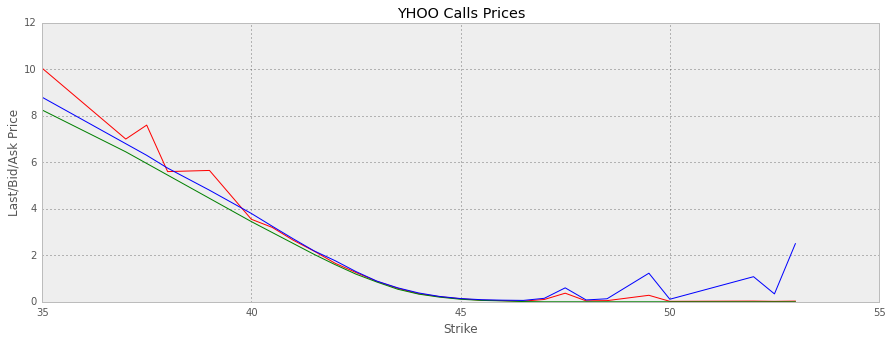

In [51]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
# Do not need to understand these commands
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

X = call_data["Strike"]
Y = call_data["Last"]
plt.plot(X, Y, 'r-')

Y = call_data["Bid"]
plt.plot(X, Y, 'g-')

Y = call_data["Ask"]
plt.plot(X, Y, 'b-')


plt.title('YHOO Calls Prices')
plt.xlabel('Strike')
plt.ylabel('Last/Bid/Ask Price')

### In Class Example: Crawl BuzzFeed

* We will try to get the top articles that appear on Buzzfeed
* We will grab the link for the article, the text of the title, the description, and the editor.
* The results will be stored in a dataframe (we will see in detail what a dataframe is, in a couple of modules)


In [ ]:
import requests # This command allows us to fetch URLs
from lxml import html # This module will allow us to parse the returned HTML/XML
import pandas

# Let's start by fetching the page, and parsing it
url = "http://www.nytimes.com/"
response = requests.get(url) # get the html of that url
doc = html.fromstring(response.text) # parse it and create a document

articleNodes = doc.findall(".//figure") 
print "HELLO GELLO"
print articleNodes
def parseFigureNode(article):
    headline = article.find("./media photo/image/a")
    print headline
    headline_text = headline.text_content()
    headline_link = headline.get("href")
    description = article.find("./p[@class='description ']")
    description_text = description.text_content().strip()
    editor = article.find('./p[@class="small-meta small-meta--full-width"]/a[1]') 
    editor_text = editor.text_content().strip()
    result = {
        "headline": headline_text,
        "URL" : headline_link,
        "description" : description_text,
        "editor" : editor_text
    }
    return result

data = [parseArticleNode(article) for article in articleNodes]
df = pandas.DataFrame(data)
print df

In [9]:
import requests # This command allows us to fetch URLs
from lxml import html # This module will allow us to parse the returned HTML/XML
import pandas

# Let's start by fetching the page, and parsing it
url = "http://www.buzzfeed.com/"
response = requests.get(url) # get the html of that url
doc = html.fromstring(response.text) # parse it and create a document

# //article/header/hgroup/h2/a
headline = doc.findall(".//article/header/image/a/src")
#print headlines.text_content()
print headline.get("href")

AttributeError: 'list' object has no attribute 'get'

In [50]:
data = [{"Title": n.text_content(), "URL": n.get("href")} for n in headlines]
df = pandas.DataFrame(data)
df

,Title,URL
0,Tom Hardy Is The Dreamy Feminist Man You’ve Be...,/rossalynwarren/an-important-reminder-that-tom...
1,Buffy And Willow Had A Mini Reunion And Proved...,/caitlinjinks/best-friends-forever
2,"This Was The Happiest, Gayest, Greatest Night ...",/patrickstrudwick/irelands-happiest-gayest-gre...
3,This Guy Started Balancing Stuff On His Nan’s ...,/ryanhatesthis/the-internet-is-daft
4,Tony Abbott Appoints A Counter-Terror Tsar And...,/alexlee/tony-abbott-appoints-a-counter-terror...
5,Ecstatic Scenes As Ireland Says “I Do” To Same...,/patrickstrudwick/ecstatic-scenes-as-ireland-s...
6,19 Times Australia Failed So Hard It Just Failed,/simoncrerar/when-straya-failed-hard
7,Netflix Accidentally Charged Australians Sever...,/robstott/netflix-accidentally-charged-people-...
8,Actress Kelly Rutherford Granted Sole Custody ...,/sheridanwatson/gossip-girl-star-kelly-rutherf...
9,18 Of The Most Iconic Guy Sebastian Moments,/tahliapritchard/go-the-fro
